In [60]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

In [57]:
#Loading the dataset
df = pd.read_csv("heartattack.csv")

df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalach,exang,ca,target
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


In [58]:
# Check for missing values in the dataset
missing_values = data.isnull().sum().sum()

if missing_values == 0:
    print("There are no missing values in the dataset.")

There are no missing values in the dataset.


In [4]:
# Features and target variable
X = df.drop(columns=['target'])
y = df['target']

# Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Train models
logistic_regression.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
decision_tree.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)

# Predictions
y_pred_logistic_regression = logistic_regression.predict(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_decision_tree = decision_tree.predict(X_test_scaled)
y_pred_random_forest = random_forest.predict(X_test_scaled)

# Model evaluation
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logistic_regression))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic_regression))

print("\nK-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

print("\nDecision Tree:")
print(classification_report(y_test, y_pred_decision_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_decision_tree))

print("\nRandom Forest:")
print(classification_report(y_test, y_pred_random_forest))
print("Accuracy:", accuracy_score(y_test, y_pred_random_forest))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Accuracy: 0.8688524590163934

K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Accuracy: 0.8360655737704918

Decision Tree:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro av

# Analyzing the coefficients

In [6]:
#Logistic Regression
logistic_regression_coefs = pd.DataFrame(logistic_regression.coef_[0], index=X.columns, columns=['Coefficient'])
logistic_regression_coefs = logistic_regression_coefs.sort_values(by='Coefficient', ascending=False)
print("Logistic Regression Coefficients:")
print(logistic_regression_coefs)

#Decision Tree
decision_tree_importance = pd.DataFrame(decision_tree.feature_importances_, index=X.columns, columns=['Importance'])
decision_tree_importance = decision_tree_importance.sort_values(by='Importance', ascending=False)
print("\nDecision Tree Feature Importance:")
print(decision_tree_importance)

#Random Forest
random_forest_importance = pd.DataFrame(random_forest.feature_importances_, index=X.columns, columns=['Importance'])
random_forest_importance = random_forest_importance.sort_values(by='Importance', ascending=False)
print("\nRandom Forest Feature Importance:")
print(random_forest_importance)

#K-Nearest Neighbors' analysis is not included as it doesn't provide direct feature importance scores.

Logistic Regression Coefficients:
         Coefficient
cp          0.676624
thalach     0.613288
restecg     0.187919
fbs         0.123914
age        -0.107884
chol       -0.272666
trtbps     -0.288405
exang      -0.672717
ca         -0.750515
sex        -0.874921

Decision Tree Feature Importance:
         Importance
cp         0.236391
ca         0.171608
age        0.170697
chol       0.143714
thalach    0.119114
exang      0.082237
trtbps     0.049793
sex        0.018099
restecg    0.008347
fbs        0.000000

Random Forest Feature Importance:
         Importance
cp         0.157353
thalach    0.151731
ca         0.145314
age        0.136174
chol       0.115896
trtbps     0.099450
exang      0.096210
sex        0.059805
restecg    0.025025
fbs        0.013043


In [7]:
# F1-score for Logistic Regression
f1_logistic_regression = f1_score(y_test, y_pred_logistic_regression)
print("F1-score for Logistic Regression:", f1_logistic_regression)

# F1-score for K-Nearest Neighbors
f1_knn = f1_score(y_test, y_pred_knn)
print("F1-score for K-Nearest Neighbors:", f1_knn)

# F1-score for Decision Tree
f1_decision_tree = f1_score(y_test, y_pred_decision_tree)
print("F1-score for Decision Tree:", f1_decision_tree)

# F1-score for Random Forest
f1_random_forest = f1_score(y_test, y_pred_random_forest)
print("F1-score for Random Forest:", f1_random_forest)

F1-score for Logistic Regression: 0.8709677419354839
F1-score for K-Nearest Neighbors: 0.8387096774193549
F1-score for Decision Tree: 0.7868852459016393
F1-score for Random Forest: 0.8571428571428571


In [8]:
# precision score for Logistic Regression
precision_logistic_regression = precision_score(y_test, y_pred_logistic_regression)
print("Precision score for Logistic Regression:", precision_logistic_regression)

# precision score for K-Nearest Neighbors
precision_knn = precision_score(y_test, y_pred_knn)
print("Precision score for K-Nearest Neighbors:", precision_knn)

# precision score for Decision Tree
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
print("Precision score for Decision Tree:", precision_decision_tree)

# precision score for Random Forest
precision_random_forest = precision_score(y_test, y_pred_random_forest)
print("Precision score for Random Forest:", precision_random_forest)

Precision score for Logistic Regression: 0.9
Precision score for K-Nearest Neighbors: 0.8666666666666667
Precision score for Decision Tree: 0.8275862068965517
Precision score for Random Forest: 0.8709677419354839


In [9]:
# recall score for Logistic Regression
recall_logistic_regression = recall_score(y_test, y_pred_logistic_regression)
print("Recall score for Logistic Regression:", recall_logistic_regression)

# recall score for K-Nearest Neighbors
recall_knn = recall_score(y_test, y_pred_knn)
print("Recall score for K-Nearest Neighbors:", recall_knn)

# recall score for Decision Tree
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
print("Recall score for Decision Tree:", recall_decision_tree)

# recall score for Random Forest
recall_random_forest = recall_score(y_test, y_pred_random_forest)
print("Recall score for Random Forest:", recall_random_forest)

Recall score for Logistic Regression: 0.84375
Recall score for K-Nearest Neighbors: 0.8125
Recall score for Decision Tree: 0.75
Recall score for Random Forest: 0.84375


# Hyperparameter tuning for the models

In [10]:
# Define hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Logistic Regression classifier
logistic_regression = LogisticRegression()

# Perform Grid Search CV
grid_search_lr = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_scaled, y_train)

# best parameters and best score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print("Best Parameters for Logistic Regression:", best_params_lr)
print("Best Score for Logistic Regression:", best_score_lr)

Best Parameters for Logistic Regression: {'C': 0.01}
Best Score for Logistic Regression: 0.7687074829931972


In [11]:
# Define hyperparameters to tune
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform Grid Search CV
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)

# best parameters and best score
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("Best Parameters for KNN:", best_params_knn)
print("Best Score for KNN:", best_score_knn)

Best Parameters for KNN: {'n_neighbors': 11}
Best Score for KNN: 0.7726190476190476


In [12]:
# Define hyperparameters to tune
param_grid = {'max_depth': [None, 5, 10, 15, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Perform Grid Search CV
grid_search_dt = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_scaled, y_train)

# best parameters and best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best Parameters for Decision Tree:", best_params_dt)
print("Best Score for Decision Tree:", best_score_dt)

Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score for Decision Tree: 0.7724489795918367


In [13]:
# Define hyperparameters to tune
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Initialize Random Forest classifier
random_forest = RandomForestClassifier()

# Perform Grid Search CV
grid_search_rf = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

# best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters for Random Forest:", best_params_rf)
print("Best Score for Random Forest:", best_score_rf)

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Score for Random Forest: 0.8222789115646257


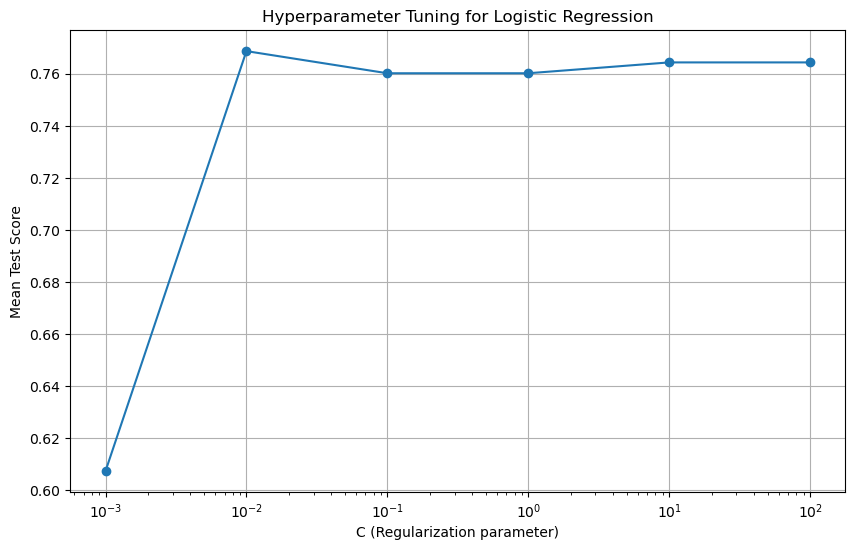

In [14]:
import matplotlib.pyplot as plt

# Extracting hyperparameters and their corresponding scores
params_lr = [params['C'] for params in grid_search_lr.cv_results_['params']]
scores_lr = grid_search_lr.cv_results_['mean_test_score']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(params_lr, scores_lr, marker='o', linestyle='-')
plt.title("Hyperparameter Tuning for Logistic Regression")
plt.xlabel("C (Regularization parameter)")
plt.ylabel("Mean Test Score")
plt.xscale('log')
plt.grid(True)
plt.show()

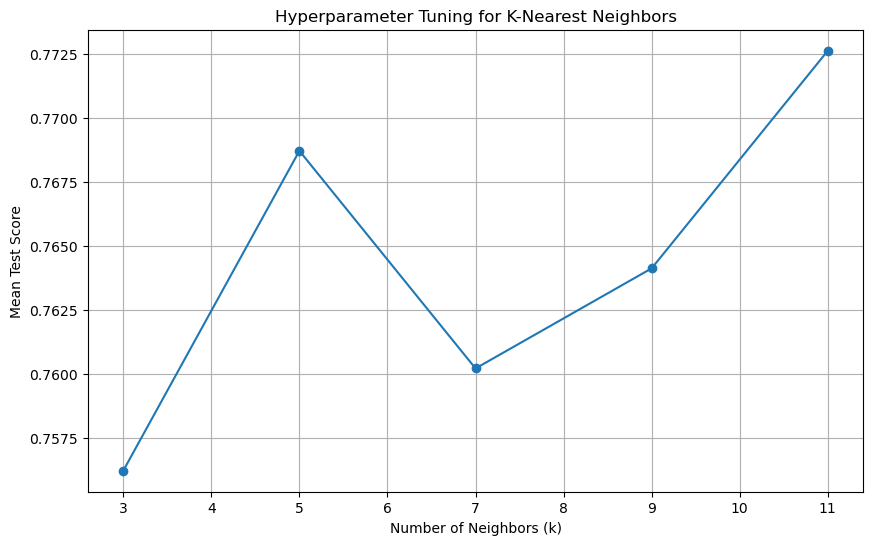

In [15]:
# Extracting hyperparameters and their corresponding scores
params_knn = [params['n_neighbors'] for params in grid_search_knn.cv_results_['params']]
scores_knn = grid_search_knn.cv_results_['mean_test_score']

# Plotting 
plt.figure(figsize=(10, 6))
plt.plot(params_knn, scores_knn, marker='o', linestyle='-')
plt.title("Hyperparameter Tuning for K-Nearest Neighbors")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Test Score")
plt.grid(True)
plt.show()

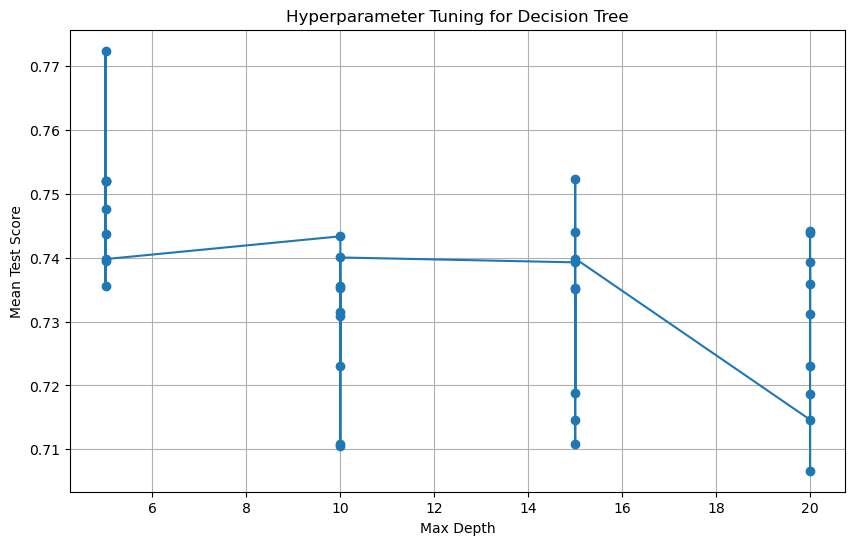

In [21]:
# Extracting hyperparameters and their corresponding scores
params_dt = [params['max_depth'] for params in grid_search_dt.cv_results_['params']]
scores_dt = grid_search_dt.cv_results_['mean_test_score']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(params_dt, scores_dt, marker='o', linestyle='-')
plt.title("Hyperparameter Tuning for Decision Tree")
plt.xlabel("Max Depth")
plt.ylabel("Mean Test Score")
plt.grid(True)
plt.show()

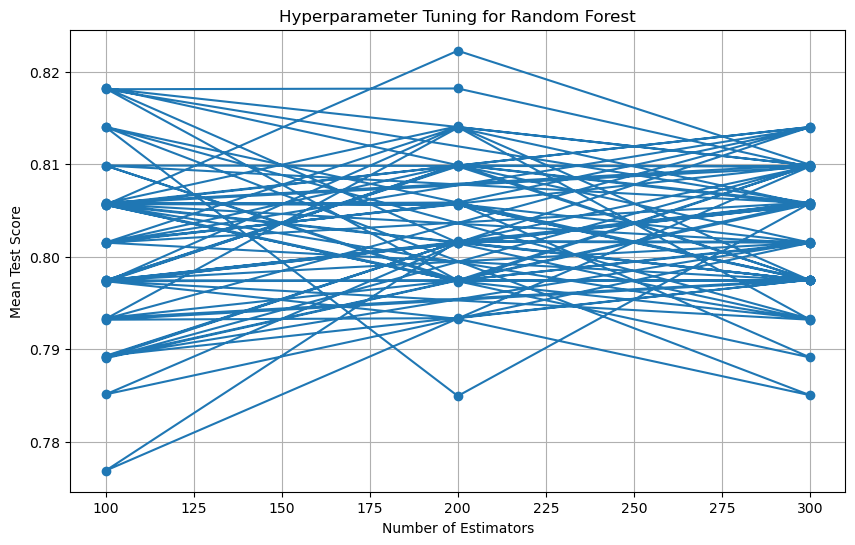

In [22]:
# Extracting hyperparameters and their corresponding scores
params_rf = [params['n_estimators'] for params in grid_search_rf.cv_results_['params']]
scores_rf = grid_search_rf.cv_results_['mean_test_score']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(params_rf, scores_rf, marker='o', linestyle='-')
plt.title("Hyperparameter Tuning for Random Forest")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Test Score")
plt.grid(True)
plt.show()

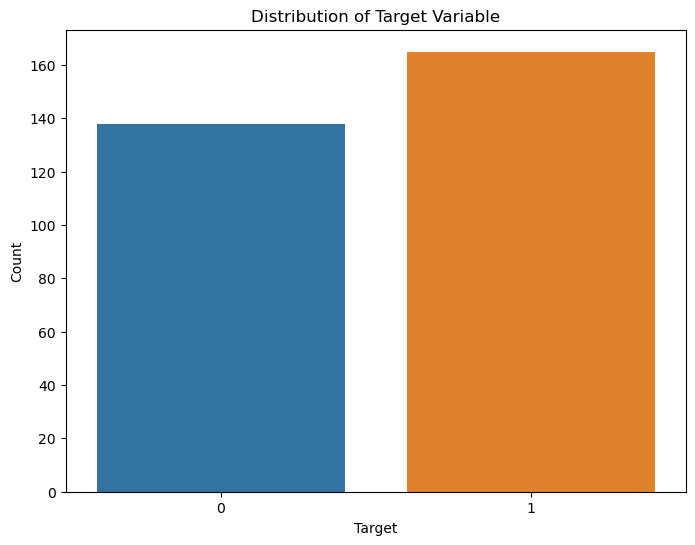

In [23]:
# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

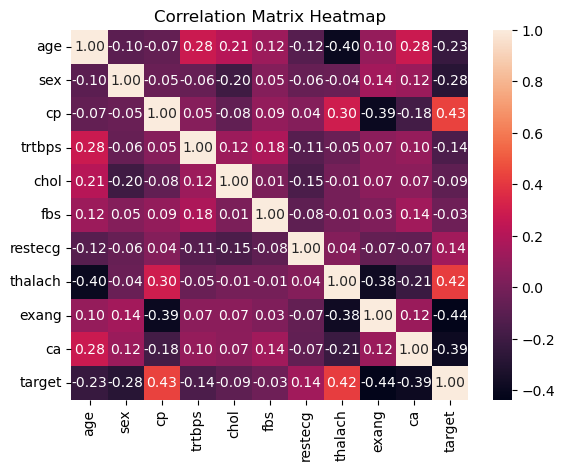

In [24]:
# correlation matrix
corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

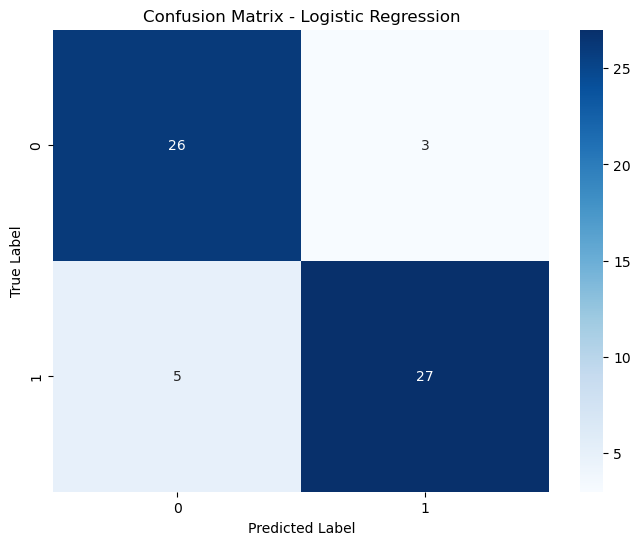

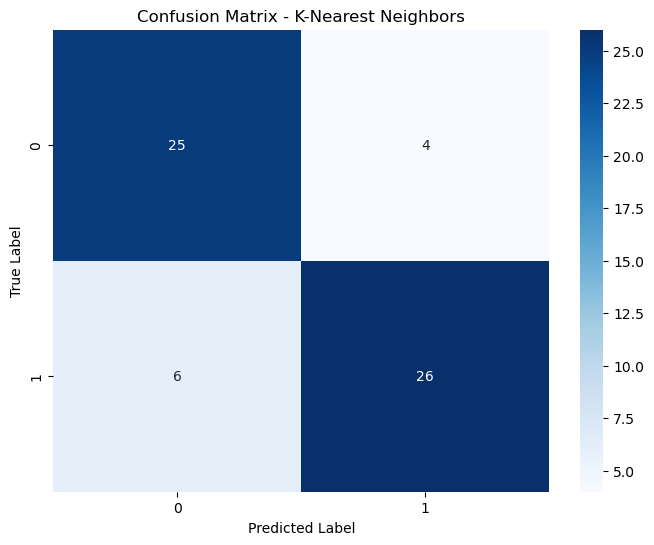

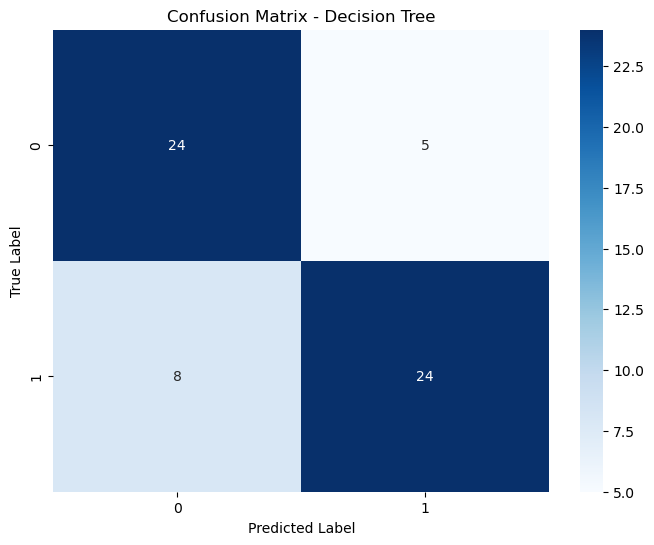

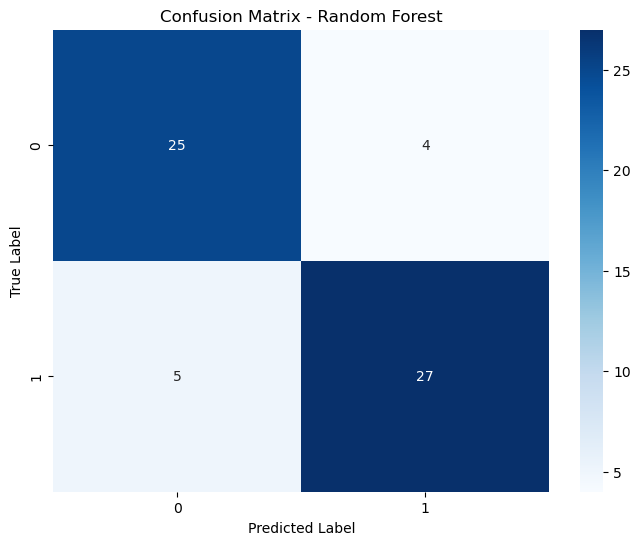

In [28]:
# plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, y_pred_logistic_regression, "Confusion Matrix - Logistic Regression")

# confusion matrix for K-Nearest Neighbors
plot_confusion_matrix(y_test, y_pred_knn, "Confusion Matrix - K-Nearest Neighbors")

# confusion matrix for Decision Tree
plot_confusion_matrix(y_test, y_pred_decision_tree, "Confusion Matrix - Decision Tree")

# Pconfusion matrix for Random Forest
plot_confusion_matrix(y_test, y_pred_random_forest, "Confusion Matrix - Random Forest")

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


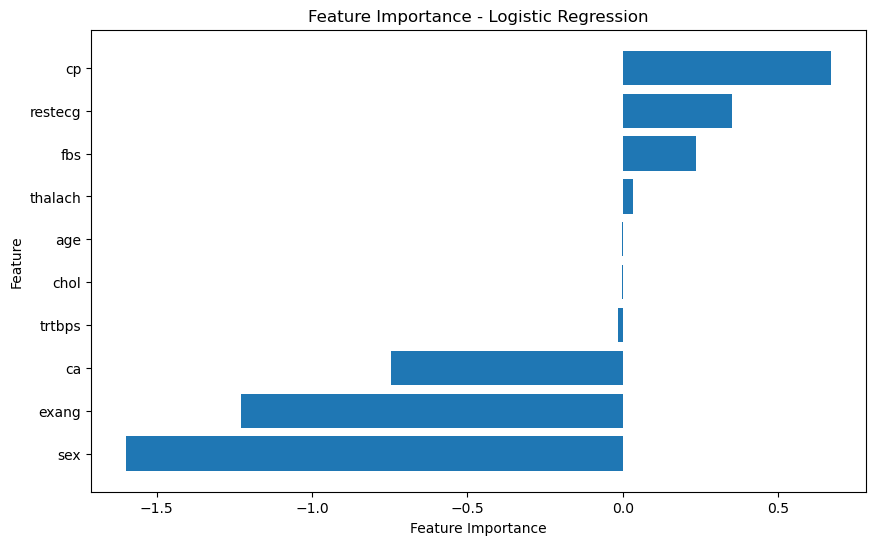

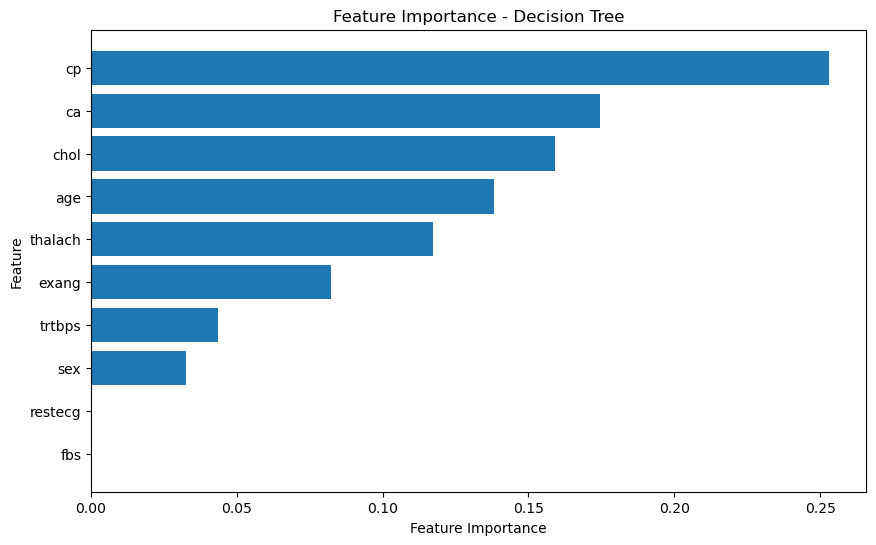

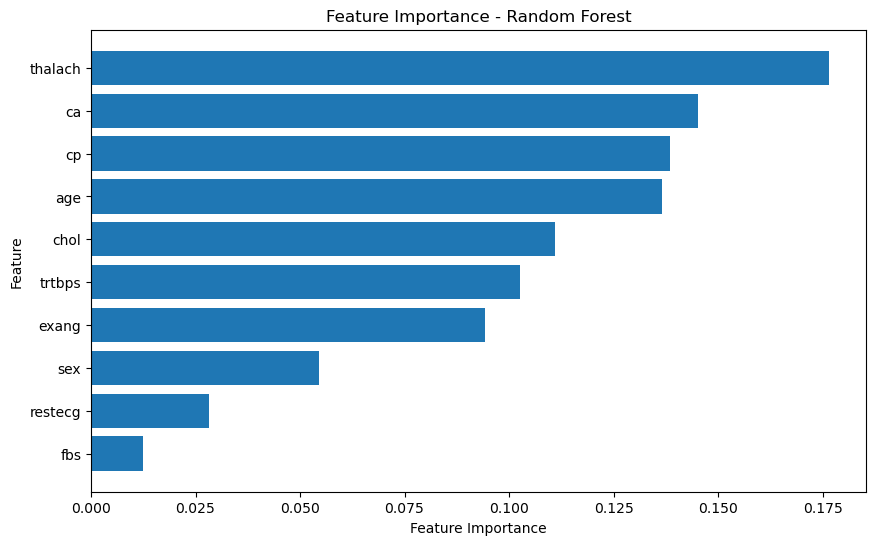

In [61]:
# Function to plot feature importance for a given model
def plot_feature_importance(feature_importance, feature_names, model_name):
    sorted_idx = feature_importance.argsort()
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance - {model_name}')
    plt.show()

# Plot feature importance for Logistic Regression
logistic_regression.fit(X_train, y_train)  # Fit the model first
plot_feature_importance(logistic_regression.coef_[0], X.columns, 'Logistic Regression')



# Plot feature importance for Decision Tree
decision_tree.fit(X_train, y_train)  # Fit the model first
plot_feature_importance(decision_tree.feature_importances_, X.columns, 'Decision Tree')

# Plot feature importance for Random Forest
random_forest.fit(X_train, y_train)  # Fit the model first
plot_feature_importance(random_forest.feature_importances_, X.columns, 'Random Forest')

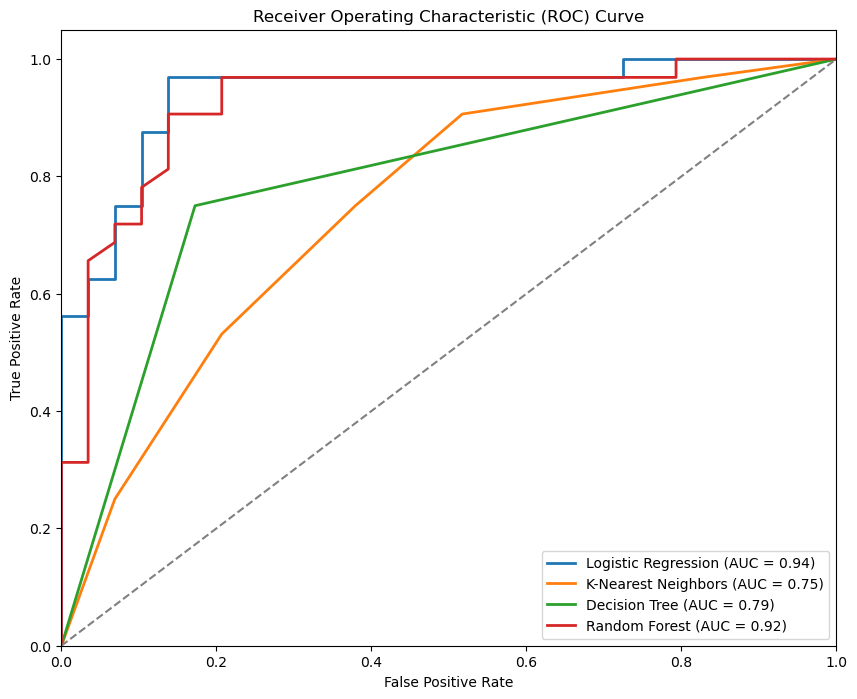

In [49]:
#plot ROC curve for a given model
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# ROC curves for all four methods
plt.figure(figsize=(10, 8))

# Logistic Regression
plot_roc_curve(y_test, logistic_regression.predict_proba(X_test)[:, 1], 'Logistic Regression')

# K-Nearest Neighbors
plot_roc_curve(y_test, knn.predict_proba(X_test)[:, 1], 'K-Nearest Neighbors')

# Decision Tree
plot_roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1], 'Decision Tree')

# Random Forest
plot_roc_curve(y_test, random_forest.predict_proba(X_test)[:, 1], 'Random Forest')

# Plotting
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# cross validation

In [62]:
# logistic regression model
logistic_regression = LogisticRegression()

#cross-validation with 5 folds
cv_scores = cross_val_score(logistic_regression, X, y, cv=5)

print("Cross-Validation Scores for Logistic Regression:", cv_scores)
print("Mean CV Score for Logistic Regression:", cv_scores.mean())

Cross-Validation Scores for Logistic Regression: [0.81967213 0.83606557 0.81967213 0.78333333 0.71666667]
Mean CV Score for Logistic Regression: 0.7950819672131149


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [51]:
#KNN model
knn = KNeighborsClassifier()

#cross-validation with 5 folds
cv_scores = cross_val_score(knn, X, y, cv=5)

print("Cross-Validation Scores for KNN:", cv_scores)
print("Mean CV Score for KNN:", cv_scores.mean())

Cross-Validation Scores for KNN: [0.60655738 0.6557377  0.57377049 0.73333333 0.63333333]
Mean CV Score for KNN: 0.6405464480874317


In [52]:
#decision tree model
decision_tree = DecisionTreeClassifier()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(decision_tree, X, y, cv=5)

print("Cross-Validation Scores for Decision Tree:", cv_scores)
print("Mean CV Score for Decision Tree:", cv_scores.mean())

Cross-Validation Scores for Decision Tree: [0.7704918  0.80327869 0.70491803 0.7        0.81666667]
Mean CV Score for Decision Tree: 0.7590710382513661


In [53]:
#random forest model
random_forest = RandomForestClassifier()

#cross-validation with 5 folds
cv_scores = cross_val_score(random_forest, X, y, cv=5)

print("Cross-Validation Scores for Random Forest:", cv_scores)
print("Mean CV Score for Random Forest:", cv_scores.mean())

Cross-Validation Scores for Random Forest: [0.81967213 0.81967213 0.81967213 0.8        0.76666667]
Mean CV Score for Random Forest: 0.8051366120218579
